# 1. Information about the submission

## 1.1 Name and number of the assignment 

**RUSSE 2022 Russian Text Detoxification Based on Parallel Corpora, Assignment 3**

## 1.2 Student name

**Solodnyova Ekaterina**

AIMasters

## 1.3 Codalab user ID

**katyanaveka**

## 1.4 Additional comments

***Enter here** any additional comments which you would like to communicate to a TA who is going to grade this work not related to the content of your submission.*

# 2. Technical Report

*Use Section 2 to describe results of your experiments as you would do writing a paper about your results. DO NOT insert code in this part. Only insert plots and tables summarizing results as needed. Use formulas if needed do described your methodology. The code is provided in Section 3.*

## 2.1 Methodology 

***Enter here** a detailed description of the method used in your submission(s) to Codalab. The description should be at least 2-4 paragraphs featuring the following: type of the model, meta-parameters, how did you select meta-parameters, any further modifications of the out-of-the-box solutions, etc. The text is markdown and you can use math environment to write formulas:* 

$\hat{y}=\beta_0 + \sum^p_{j=1} x_j \beta_j$

Also you can insert images as needed:

![image](https://upload.wikimedia.org/wikipedia/commons/6/6d/Exam_pass_logistic_curve.jpeg)

*This part of the should contain description of all methods that you tried and, most importantly, that worked the best for you. Here you can include some tricks of your preprocessing, description of the models and motivation of their usage, the description of the training process details (train-test split, cross-validation, etc.). So, everything valuable that will help us to understand the scope of your work and reproduce your pipeline*

*The 'innovativeness' scores will be assigned based on the content of this part. In case you just use a 'drop-in' baseline model these scores will be low. In case you made some clever modification of the model which improves the result this score will be low. However, it does not make sense do describe some modifications which are creative but does not work at all. Try different approaches, models, play with preprocessing, hyperparameters, etc. It is OK to reimplement some already existing approach. It is OK that some of your experiments did not work as you expected. Show us that you used your creativity and ran several experiments.*

## 2.2 Discussion of results

***Enter here** a discussion of results and a summary of the experiment. Here we want to see the final table with comparison of the baseline and all tried approaches you decided to report. Even if some method did not bring you to the top of the leaderboard, you should nevertheless indicate this result and a discussion, why, in your opinion, some approach worked and another failed. Interesting findings in the discussion will be a plus.*

Method | Precision | Recall
--- | --- | ---
Baseline | 0.88 | 0.77
My great method 1 | 0.99 | 0.11
My great method 2 | 0.90 | 0.90

*If relevant insert plots and historgams in this section e.g. testing variation of the score with respect to some parameters e.g. learning rate or size of the input dataset, etc. Please do not use code to generate plots, instead just insert images as shown below. Plots could be generated from code in Section 3. *

![image](https://upload.wikimedia.org/wikipedia/commons/thumb/d/d2/Sine_and_Cosine.svg/640px-Sine_and_Cosine.svg.png)

# 3. Code

*Enter here all code used to produce your results submitted to Codalab. Add some comments and subsections to navigate though your solution.*

*In this part you are expected to develop yourself a solution of the task and provide a reproducible code:*
- *Using Python 3;*
- *Contains code for installation of all dependencies;*
- *Contains code for downloading of all the datasets used*;
- *Contains the code for reproducing your results (in other words, if a tester downloads your notebook she should be able to run cell-by-cell the code and obtain your experimental results as described in the methodology section)*.


*As a result, you code will be graded according to these criteria:*
- ***Readability**: your code should be well-structured preferably with indicated parts of your approach (Preprocessing, Model training, Evaluation, etc.).*
- ***Reproducibility**: your code should be reproduced without any mistakes with “Run all” mode (obtaining experimental part).*


## 3.1 Requirements

In [1]:
!pip install datasets transformers seqeval corus razdel pymorphy2 evaluate -q

## 3.2 Download the data

In [2]:
!wget https://raw.githubusercontent.com/s-nlp/russe_detox_2022/main/data/input/train.tsv
!wget https://raw.githubusercontent.com/s-nlp/russe_detox_2022/main/data/input/dev.tsv
!wget https://raw.githubusercontent.com/s-nlp/russe_detox_2022/main/data/input/test.tsv

--2023-05-12 17:58:09--  https://raw.githubusercontent.com/s-nlp/russe_detox_2022/main/data/input/train.tsv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.110.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1902888 (1.8M) [text/plain]
Saving to: ‘train.tsv’

train.tsv           100%[===================>]   1.81M  --.-KB/s    in 0.07s   

2023-05-12 17:58:10 (26.1 MB/s) - ‘train.tsv’ saved [1902888/1902888]

--2023-05-12 17:58:11--  https://raw.githubusercontent.com/s-nlp/russe_detox_2022/main/data/input/dev.tsv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 200691 (196K) [text/pl

In [3]:
import pandas as pd

 
# train
data_train = []
with open("/kaggle/working/train.tsv") as f:
    for line in f:
        l = line.replace('\n', '').split('\t')
        data_train.append(l)

df_train = pd.DataFrame(data_train[1:])
df_train.columns = data_train[0]
        
# dev
data_val = []
with open("/kaggle/working/dev.tsv") as f:
    for line in f:
        l = line.replace('\n', '').split('\t')
        data_val.append(l)

df_val = pd.DataFrame(data_val[1:])
df_val.columns = data_val[0]

#test
data_test = []
with open("/kaggle/working/test.tsv") as f:
    for line in f:
        l = line.replace('\n', '').split('\t')
        data_test.append(l)

df_test = pd.DataFrame(data_test[1:])
df_test.columns = data_test[0]

In [4]:
df_train.head(10)

,index,toxic_comment,neutral_comment1,neutral_comment2,neutral_comment3
0,0,"и,чё,блядь где этот херой был до этого со свои...","Ну и где этот герой был,со своими доказательст...",Где этот герой был до этого со своими доказате...,"и,где этот герой был до этого со своими доказа..."
1,1,"О, а есть деанон этого петуха?","О, а есть деанон",,
2,2,"херну всякую пишут,из-за этого лайка.долбоебизм.","Чушь всякую пишут, из- за этого лайка.","Ерунду всякую пишут,из-за этого лайка.",
3,3,из за таких пидоров мы и страдаем,из за таких плохих людей мы и страдаем,Из-за таких людей мы и страдаем,из за таких как он мы и страдаем
4,4,гондон путинский он а не артист,"Человек Путина он, а не артист",,
5,5,как урод такую херню пишет???,кто такую ерунду пишет,,
6,6,в гсвг за такие сапоги пиздюлей получил бы от ...,В ГСВГ за такие сапоги наказали бы сослуживцы,,
7,7,Скудоумие это свойство личности проявлять умст...,Слабоумие это свойство личности проявлять умст...,,
8,8,Спасибо! Потому что предвзятость модераторов н...,Спасибо! Потому что предвзятость модераторов н...,Спасибо! Потому что предвзятость модераторов н...,
9,9,У меня бывает говорение о себе в 3-м лице... А...,У меня бывает говорение о себе в 3-м лице... А...,,


In [5]:
df_train['toxic_comment'].astype(str)

0       и,чё,блядь где этот херой был до этого со свои...
1                          О, а есть деанон этого петуха?
2        херну всякую пишут,из-за этого лайка.долбоебизм.
3                       из за таких пидоров мы и страдаем
4                         гондон путинский он а не артист
                              ...                        
6991    Блядь, пусть его уже закроют до конца его дней...
6992                     твоя химия это тотальный пиздец(
6993            меня изнасиловали, мудилка, а тебе пох(((
6994    когда наплоюсь на пидораса и маньяка похож((((...
6995           ПАШАСЛАВА МУДЕНЬ КИНУЛ БЕДНЫХ БАБ((9990909
Name: toxic_comment, Length: 6996, dtype: object

## 3.3 Preprocessing 

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


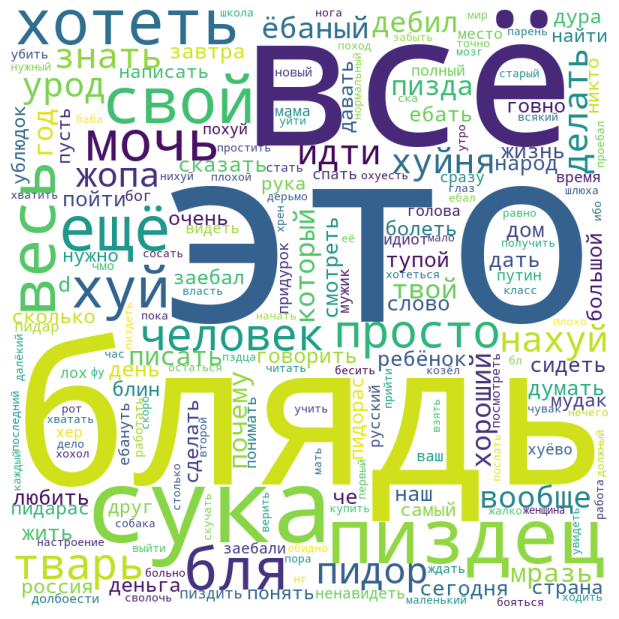

In [6]:
import pandas as pd
from wordcloud import WordCloud
from nltk.corpus import stopwords
import razdel
import pymorphy2


morph = pymorphy2.MorphAnalyzer()

# Создаем список стоп-слов
stop_words = stopwords.words('russian')

def lemmatize_word(word):
    return morph.parse(word)[0].normal_form

def tokenize_and_lemmatize(text):
    tokens = [token.text.lower() for token in razdel.tokenize(text)]
    lemmas = [lemmatize_word(token) for token in tokens]
    return [lemma for lemma in lemmas if lemma not in stop_words and lemma.isalpha()]

# tokenize_and_lemmatize for rows in df.text
df_train['lemmas'] = df_train['toxic_comment'].astype(str).apply(tokenize_and_lemmatize)

word_freq = {}
for lemmas in df_train['lemmas']:
    for lemma in lemmas:
        if lemma in word_freq:
            word_freq[lemma] += 1
        else:
            word_freq[lemma] = 1

# wordcloud creating
wordcloud = WordCloud(width=800, height=800, background_color='white', stopwords=stop_words, min_font_size=10).generate_from_frequencies(word_freq)

import matplotlib.pyplot as plt
plt.figure(figsize=(6, 6), facecolor=None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()


## 3.4 My method of text processing

In [7]:
from transformers import T5ForConditionalGeneration, T5Tokenizer

MODEL_NAME = 'cointegrated/rut5-base-paraphraser'
model = T5ForConditionalGeneration.from_pretrained(MODEL_NAME)
tokenizer = T5Tokenizer.from_pretrained(MODEL_NAME)

model.cuda()
model.eval();

In [8]:
def paraphrase(text, beams=10, grams=8, do_sample=True):
    x = tokenizer(text, return_tensors='pt', padding=True).to(model.device)
    max_size = int(x.input_ids.shape[1] * 1.5 + 10)
    out = model.generate(**x, encoder_no_repeat_ngram_size=grams, num_beams=beams, max_length=max_size, do_sample=do_sample)
    return tokenizer.decode(out[0], skip_special_tokens=True)

print(df_train.toxic_comment[2])
print(paraphrase(df_train.toxic_comment[2]))
print(df_train.toxic_comment[5])
print(paraphrase(df_train.toxic_comment[5]))
print(df_train.toxic_comment[15])
print(paraphrase(df_train.toxic_comment[15]))

херну всякую пишут,из-за этого лайка.долбоебизм.
всякую херню пишут, за этот лайк.долбоебизм.
как урод такую херню пишет???
Как урод пишет такую херню????
сергей алонцев а ты приедь ко мне в гости на дальний восток чёрт ёбанный сам услышиш
А ты приезжаешь ко мне на дальний восток


In [36]:
df_train['new_comment'] = df_train['toxic_comment'].apply(paraphrase)

ValueError: You need to specify either `text` or `text_target`.

In [9]:
df_test['new_comment'] = df_test['toxic_comment'].apply(paraphrase)

In [1]:
import torch

class DetoxDataset(torch.utils.data.Dataset):
    def __init__(self, data, tokenizer):
        self.data = data
        self.tokenizer = tokenizer
        self.tokenizer.src_lang = "ru_XX"
        self.tokenizer.tgt_lang = "ru_XX"

    def __getitem__(self, idx):

        source = self.tokenizer(
            self.data.iloc[idx].toxic_comment,
            max_length=150,
            pad_to_max_length=True,
            truncation=True,
            padding="max_length",
            return_tensors="pt",
        )
        target = self.tokenizer(
            self.data.iloc[idx].neutral_comment1,
            max_length=150,
            pad_to_max_length=True,
            truncation=True,
            padding="max_length",
            return_tensors="pt",
        )
        source["labels"] = target["input_ids"]

        return {k: v.squeeze(0) for k, v in source.items()}

    def __len__(self):
        return self.data.shape[0]

In [2]:
def paraphrase(
    text,
    model,
    tokenizer,
    n=None,
    max_length="auto",
    beams=5,
):
    texts = [text] if isinstance(text, str) else text
    inputs = tokenizer(texts, return_tensors="pt", padding=True)["input_ids"].to(
        model.device
    )

    if max_length == "auto":
        max_length = inputs.shape[1] + 10

    result = model.generate(
        inputs,
        num_return_sequences=n or 1,
        do_sample=False,
        temperature=1.0,
        repetition_penalty=10.0,
        max_length=max_length,
        min_length=int(0.5 * max_length),
        num_beams=beams,
        # forced_bos_token_id=tokenizer.lang_code_to_id[tokenizer.tgt_lang],
    )
    texts = [tokenizer.decode(r, skip_special_tokens=True) for r in result]

    if not n and isinstance(text, str):
        return texts[0]
    return texts[0]

In [3]:
from transformers import (
    BartForConditionalGeneration,
    BartTokenizer,
    Seq2SeqTrainer,
    Seq2SeqTrainingArguments,
    T5ForConditionalGeneration,
    T5Tokenizer,
)

model = T5ForConditionalGeneration.from_pretrained("google/flan-t5-small")
tokenizer = T5Tokenizer.from_pretrained("google/flan-t5-small")

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [7]:
trainset = DetoxDataset(df_train, tokenizer)
valset = DetoxDataset(df_val, tokenizer)

In [8]:
training_args = Seq2SeqTrainingArguments(
    output_dir="t5_detox",
    do_train=True,
    do_eval=True,
    per_device_train_batch_size=16,
    per_device_eval_batch_size=8,  # 8 is too much
    weight_decay=1e-5,
    num_train_epochs=1, # use 3 or 5 epochs here
    learning_rate=1e-5,
    evaluation_strategy="steps",
    save_strategy="no",
    save_total_limit=1,
    logging_steps=500,
    gradient_accumulation_steps=1,
)

trainer = Seq2SeqTrainer(
    model=model,
    args=training_args,
    train_dataset=trainset,
    eval_dataset=valset,
    tokenizer=tokenizer,
)

In [9]:
trainer.train()

/opt/conda/lib/python3.10/site-packages/transformers/optimization.py:391: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(
wandb: Logging into wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: You can find your API key in your browser here: https://wandb.ai/authorize
wandb: Paste an API key from your profile and hit enter, or press ctrl+c to quit:

  ········································


wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc


Step,Training Loss,Validation Loss


ValueError: You need to specify either `text` or `text_target`.

In [ ]:
import numpy as np
from tqdm.auto import tqdm, trange

from sklearn.model_selection import train_test_split

from transformers import AutoTokenizer
from transformers import DataCollatorWithPadding
from torch.utils.data import DataLoader
from datasets import Dataset, DatasetDict, load_metric

def create_dataset_from_df(df, label):
    data = Dataset.from_dict({'text': df.text})
    tokenizer = AutoTokenizer.from_pretrained(base_model)
    data_tokenized = data.map(lambda x: tokenizer(x['text'], truncation=True, max_length=512), batched=True, remove_columns=['text'])
    return data_tokenized['train'], data_tokenized['test'], tokenizer

def create_dataset_from_df_test(df, tokenizer):
    data = Dataset.from_dict({'text': df.text})
    data_tokenized = data.map(lambda x: tokenizer(x['text'], truncation=True, max_length=512), batched=True, remove_columns=['text'])
    return data_tokenized


In [ ]:
from transformers import AutoModel, Trainer, TrainingArguments, logging
import evaluate
import gc
import torch

    
def compute_metrics(eval_preds): 
    metric = evaluate.load("f1")
    logits, labels = eval_preds
    predictions = np.argmax(logits, axis=-1)
    return metric.compute(predictions=predictions, references=labels, average='weighted')


def train_eval(base_model, training_args):
    gc.collect()
    torch.cuda.empty_cache()
    logging.set_verbosity_error()
    
    label_list = ['masks_stance', 'masks_argument', 'quarantine_stance',
             'quarantine_argument', 'vaccines_stance', 'vaccines_argument']
    logits_dict = {}
    
    for label in label_list:
            print(label)
            train_dataset, val_dataset, tokenizer = create_dataset_from_df(df, label)

            model = AutoModelForSequenceClassification.from_pretrained(base_model, num_labels=4)

            #for layer in model.bert.embeddings.parameters(): #  freezing layers of embeddings
             #   layer.requires_grad = False

            trainer = Trainer(
                model=model,
                args=training_args,
                train_dataset=train_dataset,
                eval_dataset=val_dataset,
                tokenizer=tokenizer,
                compute_metrics=compute_metrics
            )
            trainer.train()

            results = trainer.evaluate(val_dataset)
            print(results)
        
            test_dataset = create_dataset_from_df_test(df_test, tokenizer)
            preds = trainer.predict(test_dataset)
            logits_dict[label] = preds.predictions
            ans = np.argmax(preds.predictions, axis = -1)
            df_test[label] = ans - 1
            
    return logits_dict

Noun phrases: ['a place', 'What', 'you', 'the mood', 'Mexican', 'something', 'Sushi', 'you', 'alcohol', 'SF', 'g', 'Japanese Brasserie', 'a nice sushi restaurant', 'San Francisco', 'I', 'them', 'live music', 'no live music', 'their phone number', 'any other restauarnts', 'Akira Japanese Restaurant', 'a sushi restaurant', 'San Francisco', 'you', 'a reservation', 'I', 'a reservation', 'you', 'the reservation', 'Lets', 'five pm', 'you', 'the details', 'a table', '2 people', 'Akira Japanese Restaurant', 'San Francisco', '5 pm', 'six people', 'you', 'the details', 'a table']

Verbs: ['look', 'eat', 'sound', 'want', 'eat', 'sell', 'call', 'sound', 'like', 'make', 'like', 'make', 'like', 'eat', 'confirm', 'book', 'confirm', 'book']

Mexican NORP

Chinese NORP

SF GPE

2 CARDINAL

Japanese NORP

Brasserie PERSON

San Francisco GPE

415 CARDINAL

Japanese NORP

Restaurant PERSON

San Francisco GPE

five pm TIME

2 CARDINAL

Akira Japanese Restaurant ORG

San Francisco GPE

today DATE

5 pm TIME